<a href="https://colab.research.google.com/github/Sruthi-Shivaram/Data_Analytics/blob/main/Exp_6_Classification/DA_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Name: Sruthi Shivaramakrishnan

UID: 2019110059

Batch: A

Branch: ETRX

Objective: Separating Spam From Ham

Dataset used: Emails.csv dataset


Problem 1.1 – Loading the Dataset
Begin by loading the dataset emails.csv into a data frame called emails (don't open the file with 
liboffice; import into python directly to avoid errors). Remember to pass the 
stringsAsFactors=FALSE option when loading the data. 

In [124]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

Loading the dataset 

In [125]:
data_set= pd.read_csv('/content/drive/MyDrive/emails.csv')  
data_set.head()

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1


In [126]:
data_set.describe()

,spam
count,5728.000000
mean,0.238827
std,0.426404
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [127]:
data_set.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5728 entries, 0 to 5727
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    5728 non-null   object
 1   spam    5728 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 89.6+ KB


Checking the number of rows and columns

How many emails are in the dataset? 

In [128]:
data_set.shape

(5728, 2)

There are 5728 emails in the dataset

In [129]:
data_set['spam'].value_counts()

0    4360
1    1368
Name: spam, dtype: int64

How many of the emails are spam? 

There are 1368 spam emails in the dataset

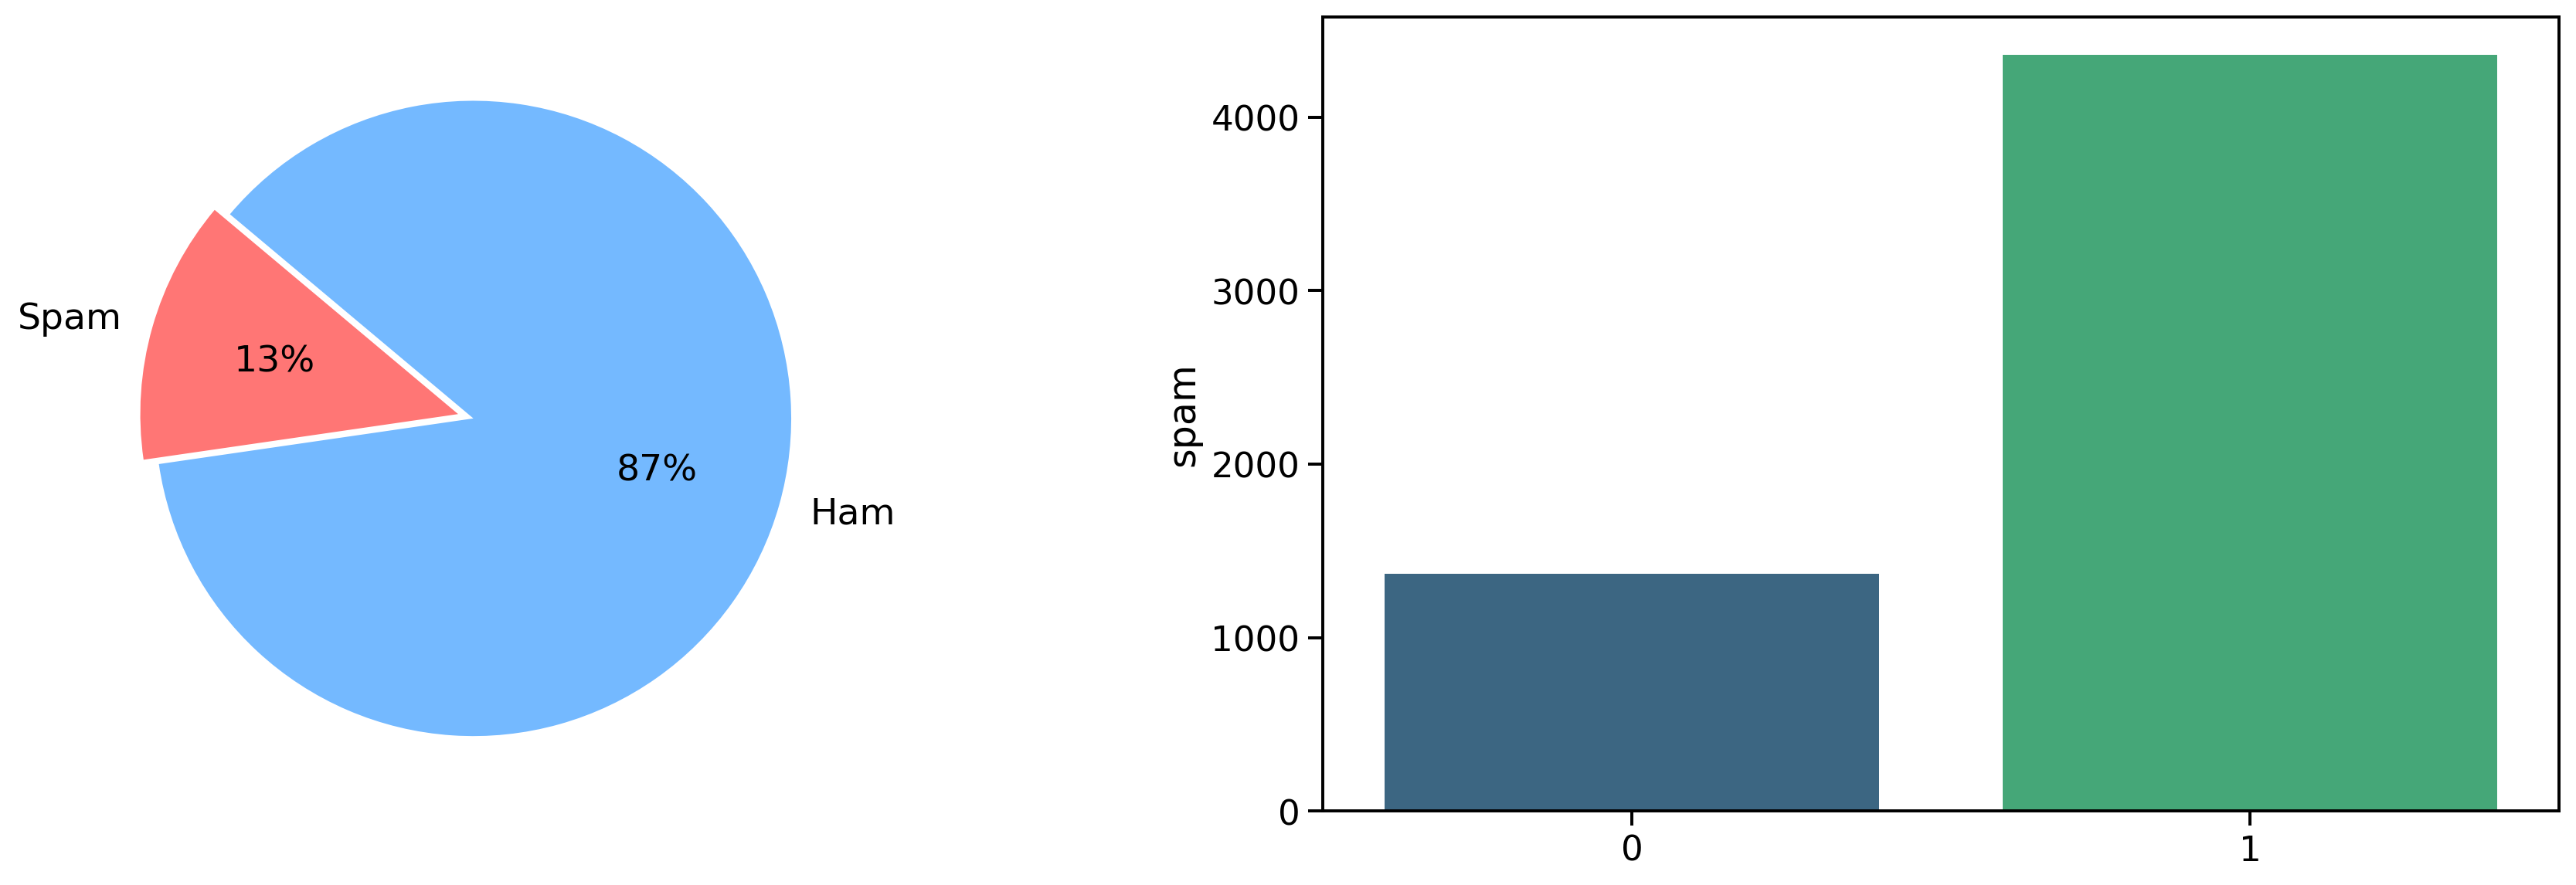

In [130]:
labels = ['Spam', 'Ham']
sizes = [747, 4825]
custom_colours = ['#ff7675', '#74b9ff']

plt.figure(figsize=(20, 6), dpi=227)
plt.subplot(1, 2, 1)
plt.pie(sizes, labels = labels, textprops={'fontsize': 15}, startangle=140, 
       autopct='%1.0f%%', colors=custom_colours, explode=[0, 0.05])

plt.subplot(1, 2, 2)
sns.barplot(x = data_set['spam'].unique(), y = data_set['spam'].value_counts(), palette= 'viridis')

plt.show()

The pie chart shows majority emails(87%) are 'ham' in the dataset

In [131]:
data_set['Total Words'] = data_set['text'].apply(lambda x: len(x.split()))

def count_total_words(text):
    char = 0
    for word in text.split():
        char += len(word)
    return char

def count_chars(text):
    
    return len(text)


data_set['Total Chars']= data_set['text'].apply(count_chars)

In [132]:
data_set.head()

,text,spam,Total Words,Total Chars
0,Subject: naturally irresistible your corporate...,1,324,1484
1,Subject: the stock trading gunslinger fanny i...,1,89,598
2,Subject: unbelievable new homes made easy im ...,1,87,448
3,Subject: 4 color printing special request add...,1,98,500
4,"Subject: do not have money , get software cds ...",1,52,235


Which word appears at the beginning of every email in the dataset? Respond as a lower-case word with punctuation removed?

The dataset shows the word 'Subject' appears in the beginning of every email.

In [133]:
data_set.columns

Index(['text', 'spam', 'Total Words', 'Total Chars'], dtype='object')

In [134]:
maxval = data_set['Total Chars'].max()

 
 
print("Maximum Characters: ")
print(maxval)



Maximum Characters: 
43952


The nchar() function counts the number of characters in a piece of text. How many characters are in the longest email in the dataset (where longest is measured in terms of the maximum number of characters)

The longest number of characters in a piece of text for a email is 43952.

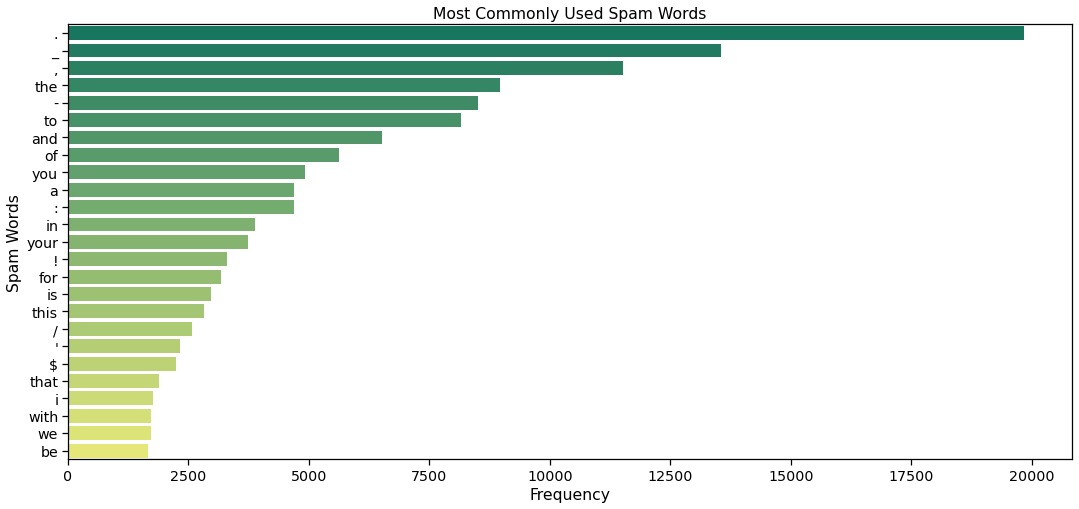

In [135]:
all_spam_words = []
for sentence in data_set[data_set['spam'] == 1]['text'].to_list():
    for word in sentence.split():
        all_spam_words.append(word)

df = pd.DataFrame(Counter(all_spam_words).most_common(25), columns= ['Word', 'Frequency'])

sns.set_context('notebook', font_scale= 1.3)
plt.figure(figsize=(18,8))
sns.barplot(y = df['Word'], x= df['Frequency'], palette= 'summer')
plt.title("Most Commonly Used Spam Words")
plt.xlabel("Frequency")
plt.ylabel("Spam Words")
plt.show()

The above dataset finds the most comonly used words in a spam email 

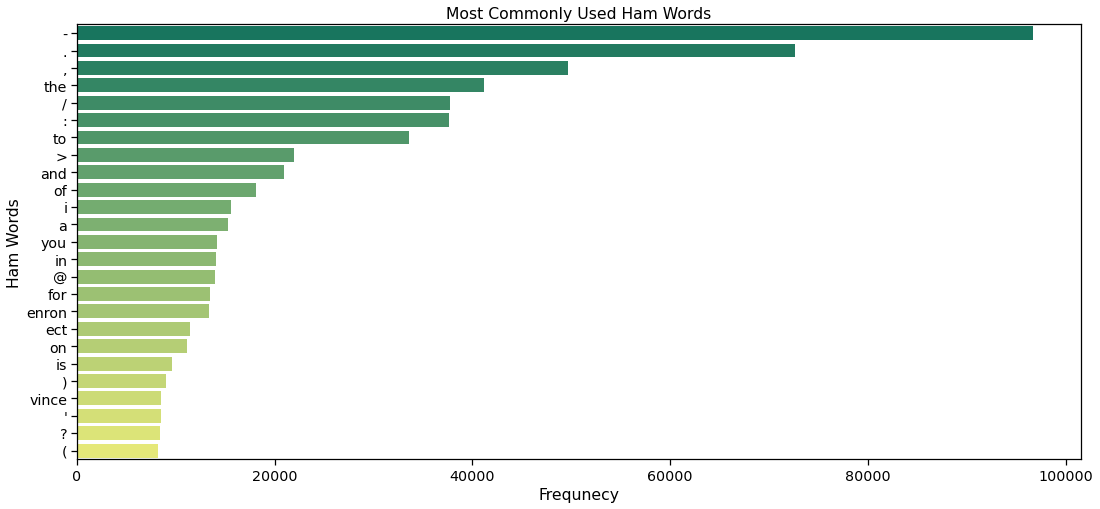

In [136]:
all_ham_words = []
for sentence in data_set[data_set['spam'] == 0]['text'].to_list():
    for word in sentence.split():
        all_ham_words.append(word)

df = pd.DataFrame(Counter(all_ham_words).most_common(25), columns= ['Word', 'Frequency'])

sns.set_context('notebook', font_scale= 1.3)
plt.figure(figsize=(18,8))
sns.barplot(y = df['Word'], x= df['Frequency'], palette= 'summer')
plt.title("Most Commonly Used Ham Words")
plt.xlabel("Frequnecy")
plt.ylabel("Ham Words")
plt.show()

The above plot shows the most commonly occuring words in a ham data. The words 'enron' and 'vince' also occur with a frequency of 20,000

Could a spam classifier potentially benefit from including the frequency of the word that appears in every 
email?  
 Yes -- the number of times the word appears might help us differentiate spam from ham. 

No -- the word appears in every email so this variable would not help us differentiate spam from ham. 

Answer:
As the above plot shows, there are certain words specific to spam and ham occuring more than once.
Hence including the frequency can benefit us for differentiating spam from ham.

In [137]:
import nltk

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [139]:
data_set.head()

,text,spam,Total Words,Total Chars
0,Subject: naturally irresistible your corporate...,1,324,1484
1,Subject: the stock trading gunslinger fanny i...,1,89,598
2,Subject: unbelievable new homes made easy im ...,1,87,448
3,Subject: 4 color printing special request add...,1,98,500
4,"Subject: do not have money , get software cds ...",1,52,235


In [140]:
data_set['text'] = data_set['text'].apply(lambda x: ' '.join(x.split(' ')[1:]))

The above snippet removes the word 'subject' from the text.

Problem 2.1 -Preparing the Corpus 

Follow the standard steps to build and pre-process the corpus: 

1) Build a new corpus variable called corpus. 

2) Using tm_map, convert the text to lowercase. 

3) Using tm_map, remove all punctuation from the corpus. 

4) Using tm_map, remove all English stopwords from the corpus. 

5) Using tm_map, stem the words in the corpus. 

6) Build a document term matrix from the corpus, called dtm. 



In [141]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
#Every mail starts with 'Subject :' will remove this from each text 

data_set['text']=data_set['text'].map(lambda text: text[1:])
data_set['text'] = data_set['text'].map(lambda text:re.sub('[^a-zA-Z0-9]+', ' ',text)).apply(lambda x: (x.lower()).split())
ps = PorterStemmer()
corpus=data_set['text'].apply(lambda text_list:' '.join(list(map(lambda word:ps.stem(word),(list(filter(lambda text:text not in set(stopwords.words('english')),text_list)))))))

# Creating the Bag of Words model

In [142]:
data_set['corpuss']=corpus

In [143]:
from nltk.corpus import stopwords

# Make a list of english stopwords
stopwords = nltk.corpus.stopwords.words("english")

print(len(stopwords))

179


In [144]:
print(corpus)

0       atur irresist corpor ident lt realli hard reco...
1       stock trade gunsling fanni merril muzo colza a...
2       nbeliev new home made easi im want show homeow...
3       color print special request addit inform click...
4       money get softwar cd softwar compat great grow...
                              ...                        
5723    e research develop charg gpg forward shirley c...
5724    e receipt visit jim thank invit visit lsu shir...
5725    e enron case studi updat wow day super thank m...
5726    e interest david pleas call shirley crenshaw a...
5727    ew aurora 5 2 updat aurora version 5 2 fastest...
Name: text, Length: 5728, dtype: object


In [145]:
count=0
for i in range(5728):
    count=count+len(corpus[i].split())
print(count)

878314


How many terms are in dtm?  

There are 878314 terms in dtm

In [146]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
X = cv.fit_transform(corpus.values).toarray()
y = data_set.iloc[:, 1].values


The above snippet vectorises the text from the dataset

In [147]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
X_train, X_test, y_train, y_test = train_test_split( 
          X, y, test_size = 0.3, random_state = 100)

In [148]:
spamCART = DecisionTreeClassifier()

# Train Decision Tree Classifer
spamCART = spamCART.fit(X_train,y_train)
spamtrain=spamCART.predict(X_train)
#Predict the response for test dataset
y_pred =  spamCART.predict(X_test)

The above snippet applies descison tree classifier to the dataset

In [ ]:
#CART train metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score,f1_score

print('Accuracy score: ', accuracy_score(y_train, spamtrain))
print('Precision score: ', precision_score(y_train, spamtrain))
print('Recall score: ', recall_score(y_train, spamtrain))
print("F1 score: ",f1_score(y_train,spamtrain))

Sklearn uses a default threshold of 0.5 for predictions.

What is the training set accuracy of spamCART, using a threshold of 0.5 for predictions? 


The accuracy is 100% for training set in CART

In [ ]:
from sklearn.ensemble import RandomForestClassifier
  
 # create regressor object
spamRF = RandomForestClassifier(n_estimators = 100, random_state = 0)
  
# fit the regressor with x and y data
spamRF=spamRF.fit(X_train,y_train)  
spamRFtrain=spamRF.predict(X_train)

The above snippet applies Random Forest classifier to the dataset




In [ ]:
y_pred1 = spamRF.predict(X_test)

In [ ]:
#train accuracy for Spam RF

from sklearn.metrics import accuracy_score, precision_score, recall_score,f1_score

print('Accuracy score: ', accuracy_score(y_train, spamRFtrain))
print('Precision score: ', precision_score(y_train, spamRFtrain))
print('Recall score: ', recall_score(y_train, spamRFtrain))
print("F1 score: ",f1_score(y_train,spamRFtrain))

What is the training set accuracy of spamRF, using a threshold of 0.5 for predictions? (Remember that 
your answer might not match ours exactly, due to random behavior in the random forest algorithm on 
different operating systems.) 

The accuracy is 100% for Random Forest

In [ ]:
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt
fpr, tpr, _ = metrics.roc_curve(y_train,  spamtrain)
auc = round(metrics.roc_auc_score(y_train,  spamtrain), 4)
plt.plot(fpr,tpr,label="CART, AUC="+str(auc))

fpr, tpr, _ = metrics.roc_curve(y_train, spamRFtrain)
auc = round(metrics.roc_auc_score(y_train, spamRFtrain), 4)
plt.plot(fpr,tpr,label="Random Forest, AUC="+str(auc))

#add legend
plt.legend()

What is the training set AUC of spamCART? 
What is the training set AUC of spamRF? 

The AUC for both the models is 100% in training set

In [ ]:
from sklearn import tree
tree.plot_tree(spamCART)

How many of the word stems "enron", "hou", "vinc", and "kaminski" appear in the CART tree? 

In the most frequently used Ham words, the words 'Vinc' and 'enron' appear and hence will be used for Ham classification in case of CART algorithm.

In [ ]:
#CART tarin accuracy

from sklearn.metrics import accuracy_score, precision_score, recall_score,f1_score

print('Accuracy score: ', accuracy_score(y_test, y_pred))
print('Precision score: ', precision_score(y_test, y_pred))
print('Recall score: ', recall_score(y_test, y_pred))
print("F1 score: ",f1_score(y_test, y_pred))

What is the testing set accuracy of spamCART, using a threshold of 0.5 for predictions? 

The testing set accuracy for CART is 96.2187%

In [ ]:
#Random Forest train accuracy
from sklearn.metrics import accuracy_score, precision_score, recall_score,f1_score

print('Accuracy score: ', accuracy_score(y_test, y_pred1))
print('Precision score: ', precision_score(y_test, y_pred1))
print('Recall score: ', recall_score(y_test, y_pred1))
print("F1 score: ",f1_score(y_test, y_pred1))

What is the testing set accuracy of spamRF, using a threshold of 0.5 for predictions? 

The testing set accuracy for Random Forest is 97.673065%

In [ ]:
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred)
auc = round(metrics.roc_auc_score(y_test,  y_pred), 4)
plt.plot(fpr,tpr,label="CART, AUC="+str(auc))

fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred1)
auc = round(metrics.roc_auc_score(y_test,  y_pred1), 4)
plt.plot(fpr,tpr,label="Random Forest, AUC="+str(auc))

#add legend
plt.legend()

What is the testing set AUC of spamCART? 

The testing set AUC for SpamCART is 0.9503

What is the testing set AUC of spamRF? 

The testing set AUC for SpamCART is 0.9539

Inferences:





1. AUC score for CART is 0.9503 and Random Forest is 0.9539 in the above model
2.  AUC gives a measure of separability for classes 
3. A good AUC score indicates good separability
4. Here the AUC score for Random Forest is greater hence provides a better separabilty
5. In the above dataset, the training accuracy is 100% for both models.
6. Data preprocessing is crucial as it helps to remove all the unecessary words and characters and convert it into a suitable form for the algorithm.

